In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm

$a)$ Demuestre el algoritmo de Numerov


$$y''_{x_n}-R_{x_n}y_{x_n}=S_{x_n}$$
Tomando los pasos del metódo como $h = x_n -x_{n-1}$ o similarmente $h = x_{n+1} - x_{n}$, expandimos en Taylor para $y(x)$ alrededor de $x_n$:

$$
y(x_{n+1})=y(x_n)+y'(x_n)h+\frac{y''_{x_n}}{2!}h^2+\frac{y'''_{x_n}}{3!}h^3+\frac{y''''_{x_n}}{4!}h^4+\frac{y''''''_{x_n}}{5!}h^5+\frac{y''''''_{x_n}}{6!}h^6
$$

De manera similar, se tiene que:

$$
y(x_{n-1})=y(x_n)-y'(x_n)h+\frac{y''_{x_n}}{2!}h^2-\frac{y'''_{x_n}}{3!}h^3+\frac{y''''_{x_n}}{4!}h^4-\frac{y''''''_{x_n}}{5!}h^5+\frac{y''''''_{x_n}}{6!}h^6
$$

Sumando $y(x_{n-1})$ y $y(x_{n+1})$

$$
y(x_{n+1})+y(x_{n-1}) = 2y_{x_n} + y''_{x_n}h^2 + 2\frac{y''''_{x_n}}{4!}h^4 + \cal{O} (h^6)
$$

Reorganizando términos:

$$
y(x_{n+1})-2y_{x_n}+y(x_{n-1}) =  (y''_{x_n} + \frac{y''''_{x_n}}{12}h^2)h^2 + \cal{O} (h^6)
$$

Teniendo en cuenta que $y''_{x_n}=R_{x_n}y_{x_n}+S_{x_n}$. Esto implica que:

$$
h^2y''''_{x_n} = R_{x_{n+1}}y_{x_{n+1}} + S_{x_{n+1}} - 2R_{x_n}y_{x_n} - 2S_{x_n} +R_{x_{n-1}}y_{x_{n-1}} + S_{x_{n+1}} +\cal{O} (h^4)
$$
Sustituyendo dentro del procedimiento hecho anteriormente:

$$
y_{x_{n+1}}-2y_{x_n}+y_{x_{n-1}} =  (R_{x_n}y_{x_n}+S_{x_n})h^2+( R_{x_{n+1}}y_{x_{n+1}} + S_{x_{n+1}} - 2R_{x_n}y_{x_n} - 2S_{x_n} +R_{x_{n-1}}y_{x_{n-1}} + S_{x_{n+1}})\frac{h^2}{12} + \cal{O} (h^6)
$$
Agrupando términos, nos da como resultado:

$$
y_{x_{n+1}}(1-\frac{h^2}{12}R_{x_{n+1}})-2y_{x_{n}}(1+\frac{5h^2}{12})+y_{x_{n-1}}(1-\frac{h^2}{12}R_{x_{n-1}})=\frac{h^2}{12}(S_{x_{n+1}}+10S_{x_{n}}+S_{x_{n-1}})+ \cal{O} (h^6)
$$

$b)$ 
$$
-\frac{\hbar}{2m}\frac{d^2\psi}{dx^2} + V(x)\psi = E\psi
$$

Donde $V(x)=\frac{1}{2}m\omega ^2 x^2$, $m=1$, $\omega=1$ y $\hbar=1$
$$
\frac{d^2\psi}{dx^2} - \frac{2m}{\hbar^2}V(x)\psi = -\frac{2m}{\hbar^2}E\psi
$$

$$
\frac{d^2\psi}{dx^2} - \frac{2m}{\hbar^2}(V(x)-E)\psi = 0
$$
De esto, se puede decuri que:

$$
R_n = \frac{2m}{\hbar^2}(V(x)-E)=\frac{2m}{\hbar^2}(\frac{1}{2}m\omega ^2 x^2-E)
$$

$$
R_n= x^2-E
$$

Por lo tanto:
$$
S_n = 0
$$

$c)$

In [7]:
Disc=np.linspace(-5, 5, 1000)

$d)$

In [126]:
def Potential(x, E):
    m=1
    w=1
    hb=1
    return (2*m*0.5*m*(w**2)*x**2/hb**2 - 2*m*E/hb**2)

In [127]:
def Numerov(Disc, E, P):
    psi = np.zeros_like(Disc)
    psi[0] = 0
    psi[1] = 1e-5
    U = P(Disc, E)
    h = Disc[1]-Disc[0]
    for i in range(2, len(Disc)):
        Psip = 1 - U[i-2]*h**2/12
        PsiP = 1 + U[i-1]*5*h**2/12
        PsiF = 1- U[i]*h**2/12
        
        psi[i] = (2*psi[i-1]*PsiP - psi[i-2]*Psip)/(PsiF)
        
    return psi

In [128]:
E = np.arange(0, 6, 0.5)

EL = np.array([])

for i in E:
    if Numerov(Disc,i, Potential)[-1]*Numerov(Disc, i+0.001,Potential)[-1]<0:
        EL = np.append(EL,i)

In [129]:
EL

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

<IPython.core.display.Javascript object>


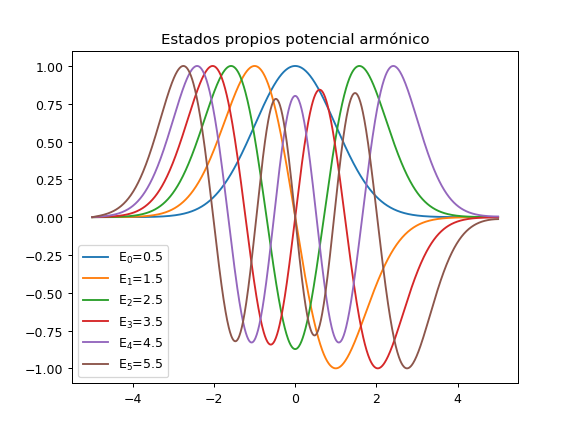

In [170]:

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(EL)):
    e = EL[i]
    ax.plot(Disc, Numerov(Disc, e, Potential)/np.max(Numerov(Disc, e, Potential)), label =(f'E$_{i}$'f'={EL[i]}'))
    ax.set_title('Estados propios potencial armónico')
    ax.legend()

In [117]:
def Potential2(x, E):
    return -20*np.exp((-x**2)/20) -2*E

In [155]:
E2 = np.arange(-10, -5.4, 0.001)

EL2 = np.array([])
Disc2 = np.linspace(-5,5,1000)
for i in tqdm(E2):
    
    if Numerov(Disc2,i, Potential2)[-1]*Numerov(Disc2, i+0.001,Potential2)[-1]<0:
        EL2 = np.append(EL2,i)

100%|█████████████████████████████████████████████████████████████████████████████| 4600/4600 [00:20<00:00, 221.21it/s]


In [156]:
E2, np.round(EL2,3)

(array([-10.   ,  -9.999,  -9.998, ...,  -5.403,  -5.402,  -5.401]),
 array([-9.51 , -8.548, -7.625, -6.742, -5.899]))

<IPython.core.display.Javascript object>


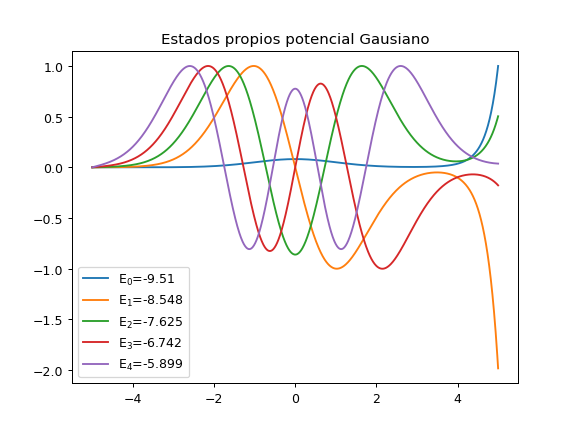

In [171]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
for i in range(len(EL2)):
    e2 = EL2[i]
    ax1.plot(Disc2, Numerov(Disc2, e2, Potential2)/np.max(Numerov(Disc2, e2, Potential2)), label =(f'E$_{i}$'f'={np.round(EL2[i],3)}'))
    ax1.set_title('Estados propios potencial Gausiano')
    ax1.legend()


In [232]:
def Potential3(x, E):
    return -8/((1+x**2)**2) -2*E

In [264]:
E3 = np.arange(-2.5, -0.4, 0.001)

EL3 = np.array([])
Disc3 = np.linspace(-5,5,1000)
for i in tqdm(E3):
    
    if Numerov(Disc3,i, Potential3)[-1]*Numerov(Disc3, i+0.001,Potential3)[-1]<0:
        EL3 = np.append(EL3,i)

100%|█████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:11<00:00, 180.85it/s]


In [265]:
EL3

array([-2.472, -0.426])

<IPython.core.display.Javascript object>


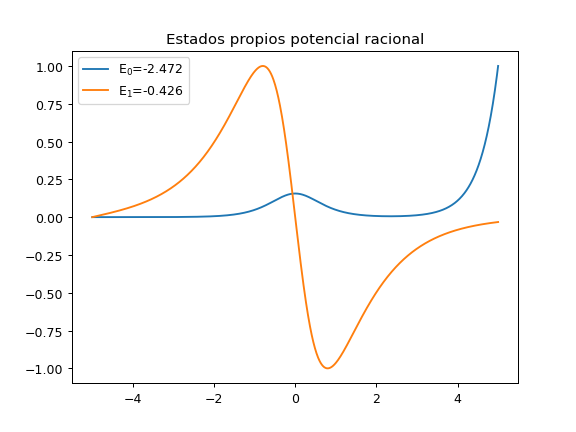

In [272]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
for i in range(len(EL3)):
    e3 = EL3[i]
    ax2.plot(Disc3, Numerov(Disc3, e3, Potential3)/np.max(Numerov(Disc3, e3, Potential3)), label =(f'E$_{i}$'f'={round(EL3[i], 4)}'))
    ax2.set_title('Estados propios potencial racional')
    ax2.legend()